In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
data= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\GITHUB PROJECTS\\House Price Prediction\\hpp.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [221]:
data=data.drop(["date","waterfront", "view", "condition", "country", "statezip", "sqft_above", "sqft_basement", "floors", "yr_renovated", "sqft_lot", "street"], axis= 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,yr_built,city
0,313000.0,3.0,1.50,1340,1955,Shoreline
1,2384000.0,5.0,2.50,3650,1921,Seattle
2,342000.0,3.0,2.00,1930,1966,Kent
3,420000.0,3.0,2.25,2000,1963,Bellevue
4,550000.0,4.0,2.50,1940,1976,Redmond


In [222]:
data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
yr_built       0
city           0
dtype: int64

In [223]:
data.groupby("bedrooms")["bedrooms"].agg("count")

bedrooms
0.0       2
1.0      38
2.0     566
3.0    2032
4.0    1531
5.0     353
6.0      61
7.0      14
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [224]:
data.groupby("city")["city"].agg("count").head()

city
Algona                  5
Auburn                176
Beaux Arts Village      1
Bellevue              286
Black Diamond           9
Name: city, dtype: int64

In [225]:
data.dtypes

price          float64
bedrooms       float64
bathrooms      float64
sqft_living      int64
yr_built         int64
city            object
dtype: object

In [226]:
data['bhk'] = data['bedrooms'].astype(int)
data["bathrooms"]=data["bathrooms"].astype(int)

In [227]:
data=data.drop(["bedrooms"], axis=1)
data.groupby("bhk")["bhk"].agg("count")

bhk
0       2
1      38
2     566
3    2032
4    1531
5     353
6      61
7      14
8       2
9       1
Name: bhk, dtype: int64

In [228]:
data["yr_built"].unique()

array([1955, 1921, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1909,
       1980, 1939, 1965, 1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991,
       1959, 1920, 1979, 1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957,
       1978, 1974, 1950, 1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929,
       2006, 2008, 2009, 2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928,
       1982, 1960, 2003, 1998, 1942, 1908, 1958, 1971, 1975, 1961, 1924,
       1902, 1962, 1953, 1999, 1994, 1930, 1984, 2010, 1912, 1947, 1916,
       1940, 1970, 1952, 1964, 1926, 1905, 1969, 1903, 1943, 1993, 1946,
       1910, 1904, 1981, 1906, 1922, 2011, 2002, 1917, 1913, 1914, 1937,
       1925, 1932, 1918, 1972, 1941, 1919, 1936, 1911, 1927, 1931, 1901,
       1907, 1915, 1935, 1933, 1934], dtype=int64)

# Feature_Engineering

In [229]:
df=data.copy()
df["price_per_sqft"]= (df["price"]/df["sqft_living"])
df['price_per_sqft']=df['price_per_sqft'].round(decimals=2)

In [230]:
df.head()

,price,bathrooms,sqft_living,yr_built,city,bhk,price_per_sqft
0,313000.0,1,1340,1955,Shoreline,3,233.58
1,2384000.0,2,3650,1921,Seattle,5,653.15
2,342000.0,2,1930,1966,Kent,3,177.20
3,420000.0,2,2000,1963,Bellevue,3,210.00
4,550000.0,2,1940,1976,Redmond,4,283.51


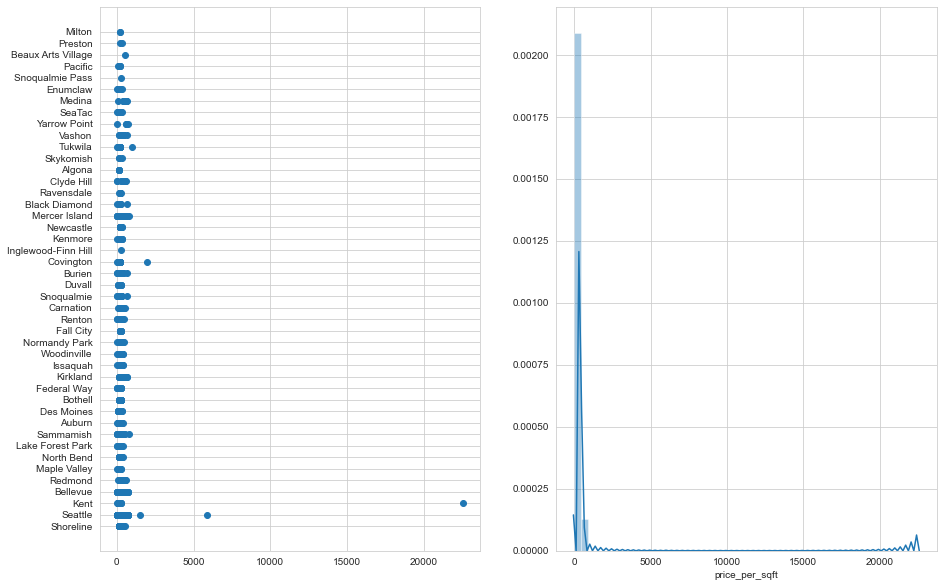

In [231]:
sns.set_style("whitegrid")
f, axes= plt.subplots(1,2, figsize=(15,10))
a1= sns.distplot(df["price_per_sqft"], kde= True, ax= axes[1])
axes[0].scatter(df['price_per_sqft'], df["city"])

In [232]:
df["price_per_sqft"].describe()

count     4600.000000
mean       265.876209
std        357.503362
min          0.000000
25%        180.817500
50%        243.855000
75%        314.840000
max      22533.900000
Name: price_per_sqft, dtype: float64

In [233]:
# the scatter plot and distplot shows that the column "price_per_sq.ft" contains outliers

In [234]:
price=df[df["price_per_sqft"]<1500]
df=price

In [235]:
len(df["price_per_sqft"])

4597

Though total no of rows are 4600, the figure 4597 shows that 3 rows were reduced from the dataset in order to deduce the outliers

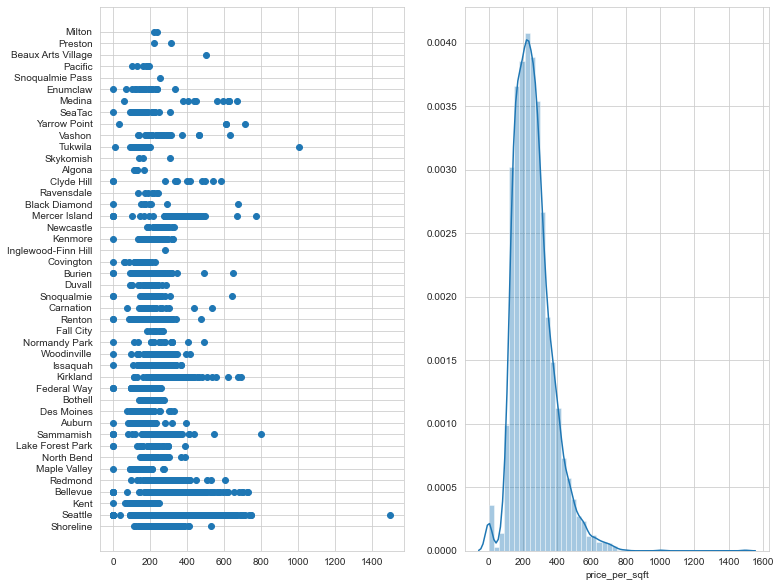

In [236]:
sns.set_style("whitegrid")
f, axes= plt.subplots(1,2, figsize=(12,10))
a1= sns.distplot(df["price_per_sqft"], kde= True, ax= axes[1])
axes[0].scatter(df['price_per_sqft'], df["city"])

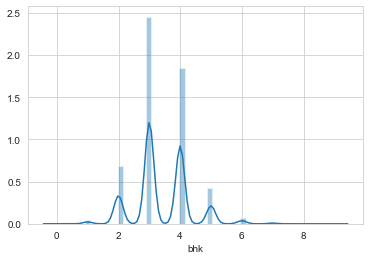

In [237]:
sns.distplot(df["bhk"])

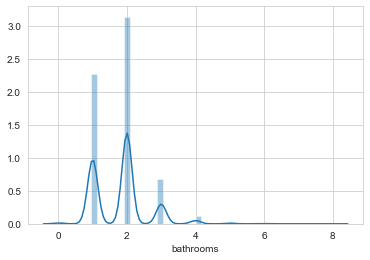

In [238]:
sns.distplot(df["bathrooms"])

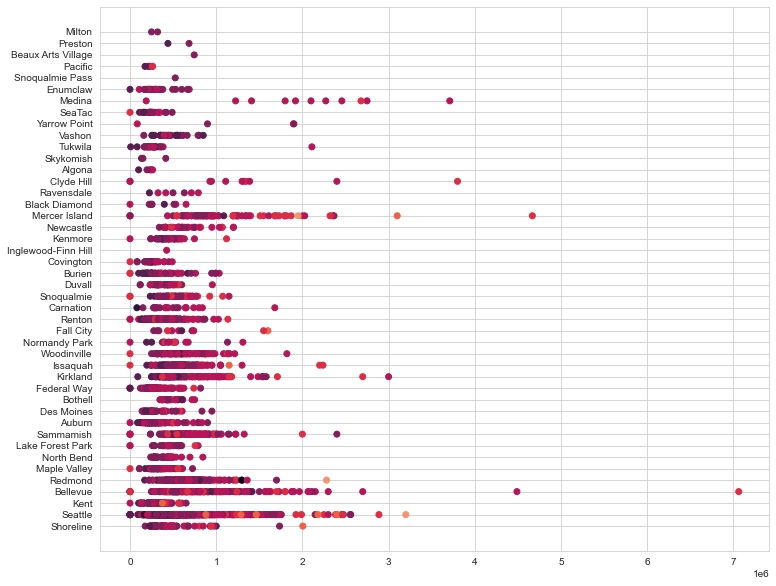

In [239]:

sns.set_style("whitegrid")
f, axes= plt.subplots(1,1, figsize=(12,10))
plt.scatter( df["price"], df["city"], c= df["bhk"])


# Building_the_model

In [240]:
df1 = df.copy()
df1 = df.drop('price_per_sqft', axis='columns')

Removing the columns that were added only for removing the outliers

In [241]:
df1.head()

,price,bathrooms,sqft_living,yr_built,city,bhk
0,313000.0,1,1340,1955,Shoreline,3
1,2384000.0,2,3650,1921,Seattle,5
2,342000.0,2,1930,1966,Kent,3
3,420000.0,2,2000,1963,Bellevue,3
4,550000.0,2,1940,1976,Redmond,4


In [270]:
#Creating the dimmies for the column city
city_dummies= pd.get_dummies(df1["city"])
city_dummies
df1= pd.concat([df1, city_dummies], axis= "columns")
df1=df1.drop("city", axis= 1)
df1.head()

,price,bathrooms,sqft_living,yr_built,bhk,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,1,1340,1955,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,2,3650,1921,5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,2,1930,1966,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,2,2000,1963,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,2,1940,1976,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
#Create variables for splitting df1 into train and test 

x= df1.drop("price", axis=1)
y= df1["price"]

In [272]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=50)

In [273]:
from sklearn import preprocessing

def convert(df1):
    number = preprocessing.LabelEncoder()
    data['Seattle'] = number.fit_transform(df1['Seattle'])
    df1=df1.fillna(1) # fill holes with default value
    return df1.head()

In [276]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [277]:
model.score(xtest, ytest)

0.6296317736122121

In [278]:

# For finding the appropriate city
np.where(x.columns=='Seattle')[0][0]

39

In [294]:
#Creating the function to predict the price

def prediction(city,sqft_living, bhk, bathrooms):
    
    loc_index = -1
        
    if city!='Auburn':
        loc_index = int(np.where(x.columns==city)[0][0])
    
    X = np.zeros(len(x.columns))
    X[0] = sqft_living
    X[1] = bhk
    X[2] = bathrooms
    
    if loc_index >= 0:
        X[loc_index] = 1
        
    return model.predict([X])[0]


In [310]:
prediction( "Seattle" , 1200, 2,1)


27380714.86173886

In [309]:
prediction("Vashon", 2000, 2, 1)

43990118.938069925

In [311]:
prediction("Woodinville", 1100, 1, 1)

25271962.980838846